# Project #2 Part 2: Web Scraping

**Name:** Gabriel George

**Date:** 11/24/24

**Excercise:** Finding a website and scraping each page and plotting the data

**Purpose:** Pefrom web scraping on a website of your choosing in this case a quote website for me


/var/folders/fh/68ttccfj0yq3n_9rbf90j2wm0000gn/T/ipykernel_1227/1589735265.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Rating"] = df["Rating"].replace(


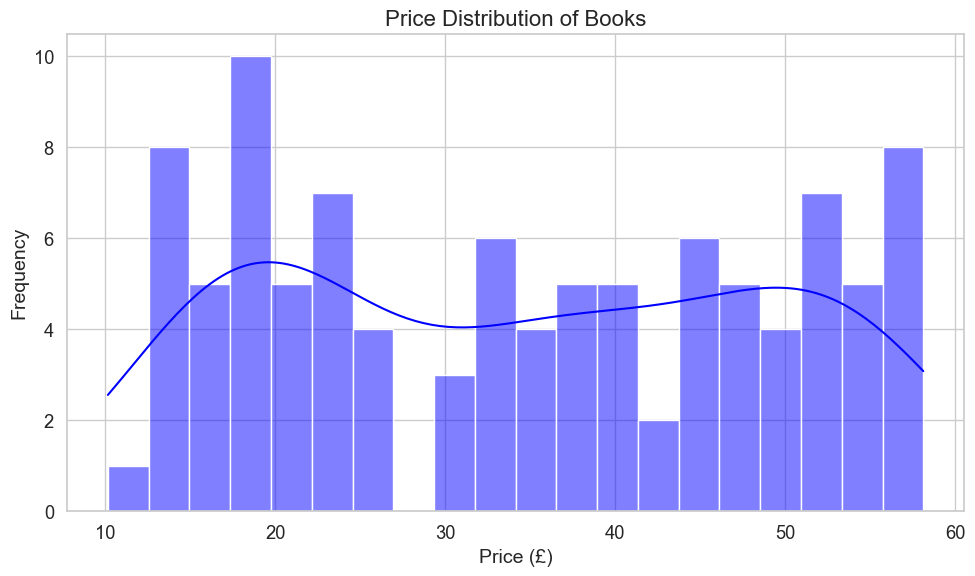

/var/folders/fh/68ttccfj0yq3n_9rbf90j2wm0000gn/T/ipykernel_1227/1589735265.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="viridis")


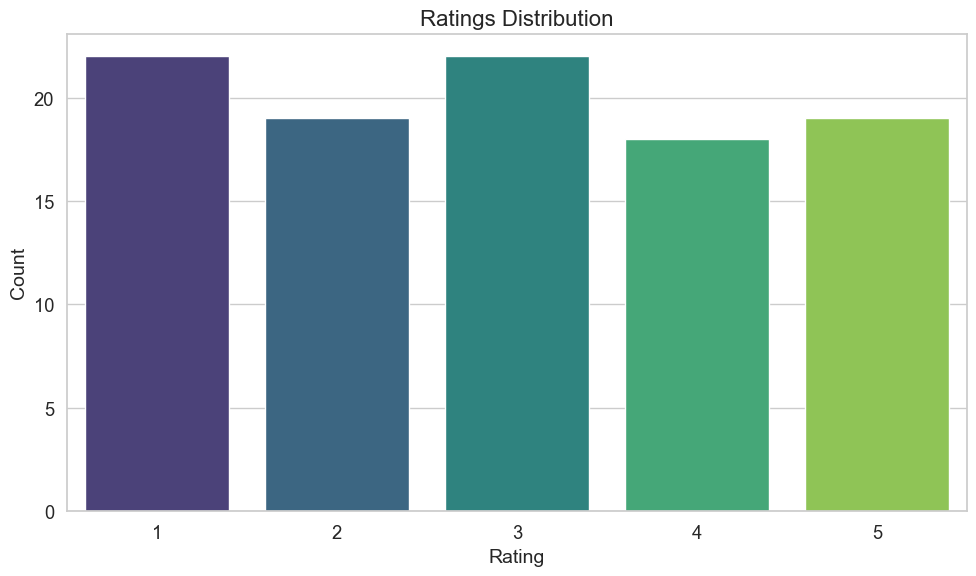

Analysis Results:

1. Average Price of Books: £34.56

2. Average Rating of Books: 2.9

3. Most Expensive Book:
Title     The Death of Humanity: and the Case for Life
Price                                            58.11
Rating                                               4
Name: 68, dtype: object


In [1]:
# Importing the necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to scrape books data
def scrape_books(pages=5):
    base_url = "http://books.toscrape.com/catalogue/page-{}.html"
    data = []
    
    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")
        
        books = soup.find_all("article", class_="product_pod")
        
        for book in books:
            title = book.h3.a["title"]
            price = book.find("p", class_="price_color").text.strip("£")
            rating = book.p["class"][1]
            data.append({"Title": title, "Price": float(price), "Rating": rating})
    
    return pd.DataFrame(data)

# Scraping book data
df = scrape_books(pages=5)

# Analyzing data
df["Rating"] = df["Rating"].replace(
    {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
)
average_price = df["Price"].mean()
average_rating = df["Rating"].mean()
most_expensive_book = df.loc[df["Price"].idxmax()]

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plotting the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, bins=20, color="blue")
plt.title("Price Distribution of Books", fontsize=16)
plt.xlabel("Price (£)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Plotting the rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Rating", data=df, palette="viridis")
plt.title("Ratings Distribution", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()

# Results
print("Analysis Results:")
print(f"\n1. Average Price of Books: £{average_price:.2f}")
print(f"\n2. Average Rating of Books: {average_rating:.1f}")
print("\n3. Most Expensive Book:")
print(most_expensive_book)
